In [1]:
import numpy
import math
from numpy import genfromtxt

# Abrindo o CSV
data = genfromtxt('16PF/data.csv', delimiter=',')
print(data)

[[             nan              nan              nan ...,              nan
               nan              nan]
 [  1.00000000e+00   4.00000000e+00   2.00000000e+00 ...,              nan
    6.00000000e+00   9.14000000e+02]
 [  4.00000000e+00   3.00000000e+00   4.00000000e+00 ...,              nan
    1.00000000e+00   8.91000000e+02]
 ..., 
 [  2.00000000e+00   4.00000000e+00   2.00000000e+00 ...,              nan
    6.00000000e+00   9.32000000e+02]
 [  4.00000000e+00   4.00000000e+00   4.00000000e+00 ...,              nan
    2.00000000e+00   1.21200000e+03]
 [  4.00000000e+00   5.00000000e+00   4.00000000e+00 ...,              nan
    2.00000000e+00   9.50000000e+02]]


In [3]:
# Pegando apenas as entradas
data = data[1: , 0:163]

(nData, nFeatures) = data.shape

print(data.shape)
print(data)

(49158, 163)
[[ 4.  3.  4. ...,  2.  2.  2.]
 [ 3.  4.  4. ...,  3.  3.  3.]
 [ 4.  5.  4. ...,  3.  4.  4.]
 ..., 
 [ 2.  4.  2. ...,  4.  5.  4.]
 [ 4.  4.  4. ...,  4.  5.  4.]
 [ 4.  5.  4. ...,  4.  4.  5.]]


In [4]:
# Normalizando os dados
data = (data-2.5)/2.5

print(data.shape)
print(data)

(49158, 163)
[[ 0.6  0.2  0.6 ..., -0.2 -0.2 -0.2]
 [ 0.2  0.6  0.6 ...,  0.2  0.2  0.2]
 [ 0.6  1.   0.6 ...,  0.2  0.6  0.6]
 ..., 
 [-0.2  0.6 -0.2 ...,  0.6  1.   0.6]
 [ 0.6  0.6  0.6 ...,  0.6  1.   0.6]
 [ 0.6  1.   0.6 ...,  0.6  0.6  1. ]]


In [5]:
# Clusterizando os dados
from sklearn.cluster import KMeans

# Lista dos custos vs cluster para plotar depois
XX = [];
YY = [];

# Lista de cada clusterizacao (pra nao ter que re-rodar o algoritmo de novo)
kmeans = [];

maxClusters = 30

for cc in range(1, maxClusters):

    km = KMeans(
                n_clusters=cc,
                n_jobs=-1
            ).fit(data)

    kmeans.append(km)
    
    # Calcula o Custo

    core = km.cluster_centers_
    label = km.labels_

    J = 0
    for i in range(0, nData):
        diferenca = data[i] - core[label[i]]
        erro = math.sqrt(numpy.dot(diferenca, diferenca))
        J = J + erro

    YY.append(J)
    XX.append(cc)
    print(cc)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[137704.1578132939, 134526.24372259734, 132431.80331737146, 131119.2386530373, 130149.2264055655, 129522.22452719825, 128940.79741491933, 128436.59018709714, 127993.26975226706, 127620.39051910925, 127307.76320644472, 127004.06371972838, 126721.58178969269, 126496.65628998315, 126267.86074591416, 126082.82407218311, 125941.73187640191, 125807.712110522, 125615.27098179069, 125495.23999063706, 125315.38918212215, 125224.30786790985, 125065.23933591368, 124967.92548455275, 124825.36312421455, 124691.0805694819, 124611.75459205842, 124508.99991152779, 124405.00946013314]


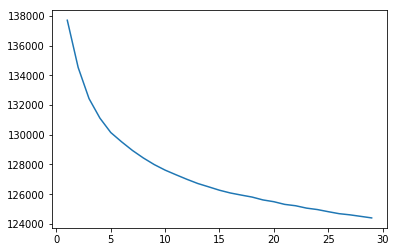

In [42]:
# Plotando os resultados
import matplotlib.pyplot as plt

print(XX)
print(YY)

plt.plot(XX, YY)
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[0.041315716872716284, 0.040415050386749619, 0.027654794220416803, 0.025244136775050673, 0.026754917108281144, 0.025802343993941223, 0.021622836654371539, 0.021735778572096767, 0.016096079862374886, 0.015864488340108882, 0.009018941930681184, 0.0071975984436171191, 0.010921668059771775, -0.002163033791401708, 0.0029094618361400651, 0.0056223447305848743, 0.0052342060035590401, 0.003276094689395262, 0.00014795465658957543, -0.001930133996089461, -0.0025977070670553039, -0.0093811555572764493, -0.0070929665661817569, -0.011866576479151585, -0.01444546435594558, -0.011234536884623543, -0.0088240219574325356, -0.0033854772750258823]


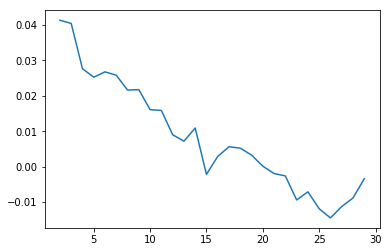

In [46]:
# Plotando a Silhueta
from sklearn import metrics

silhouette = []

for cc in range(1, maxClusters-1):
    km = kmeans[cc]
    label = km.labels_
    
    print(cc)
        
    sh = metrics.silhouette_score(data, label, sample_size=600)
    silhouette.append(sh)    
    
print(silhouette)

plt.plot(XX[1:], silhouette)
plt.show()

In [47]:
# Ve qual o melhor valor da silhueta
best = silhouette.index(max(silhouette)) + 2
print('Melhor resultado: ', best, 'clusteres with ', silhouette[best-2])

Melhor resultado:  2 clusteres with  0.0413157168727


In [23]:
# Separa os grupos da melhor silhueta
import os

# Abre o dataset como strings
with open('dataset/data.csv') as f:
    lines = f.readlines()
    
    # Cria uma pasta
    if not os.path.exists('dataset/cl'+str(best)):
        os.mkdir('dataset/cl'+str(best))
    
    # Abre os arquivos de cada cluster, e escreve o header do CSV
    out = []
    for i in range(0, best):
        oo = open('dataset/cl'+str(best)+'/cluster'+str(i)+'.csv', 'w')
        oo.write(lines[0])
        out.append(oo)
    
    # Para cada dado, escreve no arquivo certo do cluster
    label = kmeans[best-1].labels_
    for i in range(1, len(lines)):
        out[label[i-1]].write(lines[i])
    
    # Fecha os arquivos de cada cluster
    for i in range(0, best):
        oo = out[i]
        oo.close()
    

Melhor resultado:  3 clusteres with  0.0775746942826
